In [3]:
%pylab inline
import matplotlib.pyplot  as plt
import numpy 
from numpy import loadtxt
from scipy import interpolate
import mdtraj as md
import sys,os
import seaborn as sbn
sbn.set_style("whitegrid")

import mdtraj as md

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
#here I want to check why we have so many discrepancies, thus I will analyze the gradient profile
#the gradient profile has been extracted from gradients.dat files
aeq_cyc_boat_disc = loadtxt("../boat/a_eq/cyc/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
aeq_cyc_chair_disc = loadtxt("../chair/a_eq/cyc/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
aeq_cyc_boat_van = loadtxt("../boat/a_eq/cyc/run001/vanish//output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
aeq_cyc_chair_van = loadtxt("../chair/a_eq/cyc/run001/vanish/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)

aeq_wat_boat_disc = loadtxt("../boat/a_eq/free/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
aeq_wat_chair_disc = loadtxt("../chair/a_eq/free/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
aeq_wat_boat_van = loadtxt("../boat/a_eq/free/run001/vanish//output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
aeq_wat_chair_van = loadtxt("../chair/a_eq/free/run001/vanish/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)

aax_cyc_boat_disc = loadtxt("../boat/a_axial/cyc/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
aax_cyc_chair_disc = loadtxt("../chair/a_axial/cyc/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
aax_cyc_boat_van = loadtxt("../boat/a_axial/cyc/run001/vanish//output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
aax_cyc_chair_van = loadtxt("../chair/a_axial/cyc/run001/vanish/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)

aax_wat_boat_disc = loadtxt("../boat/a_axial/free/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
aax_wat_chair_disc = loadtxt("../chair/a_axial/free/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
aax_wat_boat_van = loadtxt("../boat/a_axial/free/run001/vanish//output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
aax_wat_chair_van = loadtxt("../chair/a_axial/free/run001/vanish/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)


c_cyc_boat_disc = loadtxt("../boat/c/cyc/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
c_cyc_chair_disc = loadtxt("../chair/c/cyc/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
c_cyc_boat_van = loadtxt("../boat/c/cyc/run001/vanish//output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
c_cyc_chair_van = loadtxt("../chair/c/cyc/run001/vanish/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)

c_wat_boat_disc = loadtxt("../boat/c/free/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
c_wat_chair_disc = loadtxt("../chair/c/free/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
c_wat_boat_van = loadtxt("../boat/c/free/run001/vanish//output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
c_wat_chair_van = loadtxt("../chair/c/free/run001/vanish/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)


d_cyc_boat_disc = loadtxt("../boat/d/cyc/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
d_cyc_chair_disc = loadtxt("../chair/d/cyc/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
d_cyc_boat_van = loadtxt("../boat/d/cyc/run001/vanish//output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
d_cyc_chair_van = loadtxt("../chair/d/cyc/run001/vanish/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)

d_wat_boat_disc = loadtxt("../boat/d/free/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
d_wat_chair_disc = loadtxt("../chair/d/free/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
d_wat_boat_van = loadtxt("../boat/d/free/run001/vanish//output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
d_wat_chair_van = loadtxt("../chair/d/free/run001/vanish/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)


e_cyc_boat_disc = loadtxt("../boat/e/cyc/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
e_cyc_chair_disc = loadtxt("../chair/e/cyc/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
e_cyc_boat_van = loadtxt("../boat/e/cyc/run001/vanish//output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
e_cyc_chair_van = loadtxt("../chair/e/cyc/run001/vanish/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)

e_wat_boat_disc = loadtxt("../boat/e/free/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
e_wat_chair_disc = loadtxt("../chair/e/free/run001/discharge/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
e_wat_boat_van = loadtxt("../boat/e/free/run001/vanish//output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)
e_wat_chair_van = loadtxt("../chair/e/free/run001/vanish/output/2017-04-03_gradient_profile.dat",usecols=[0,1,3],skiprows=1)




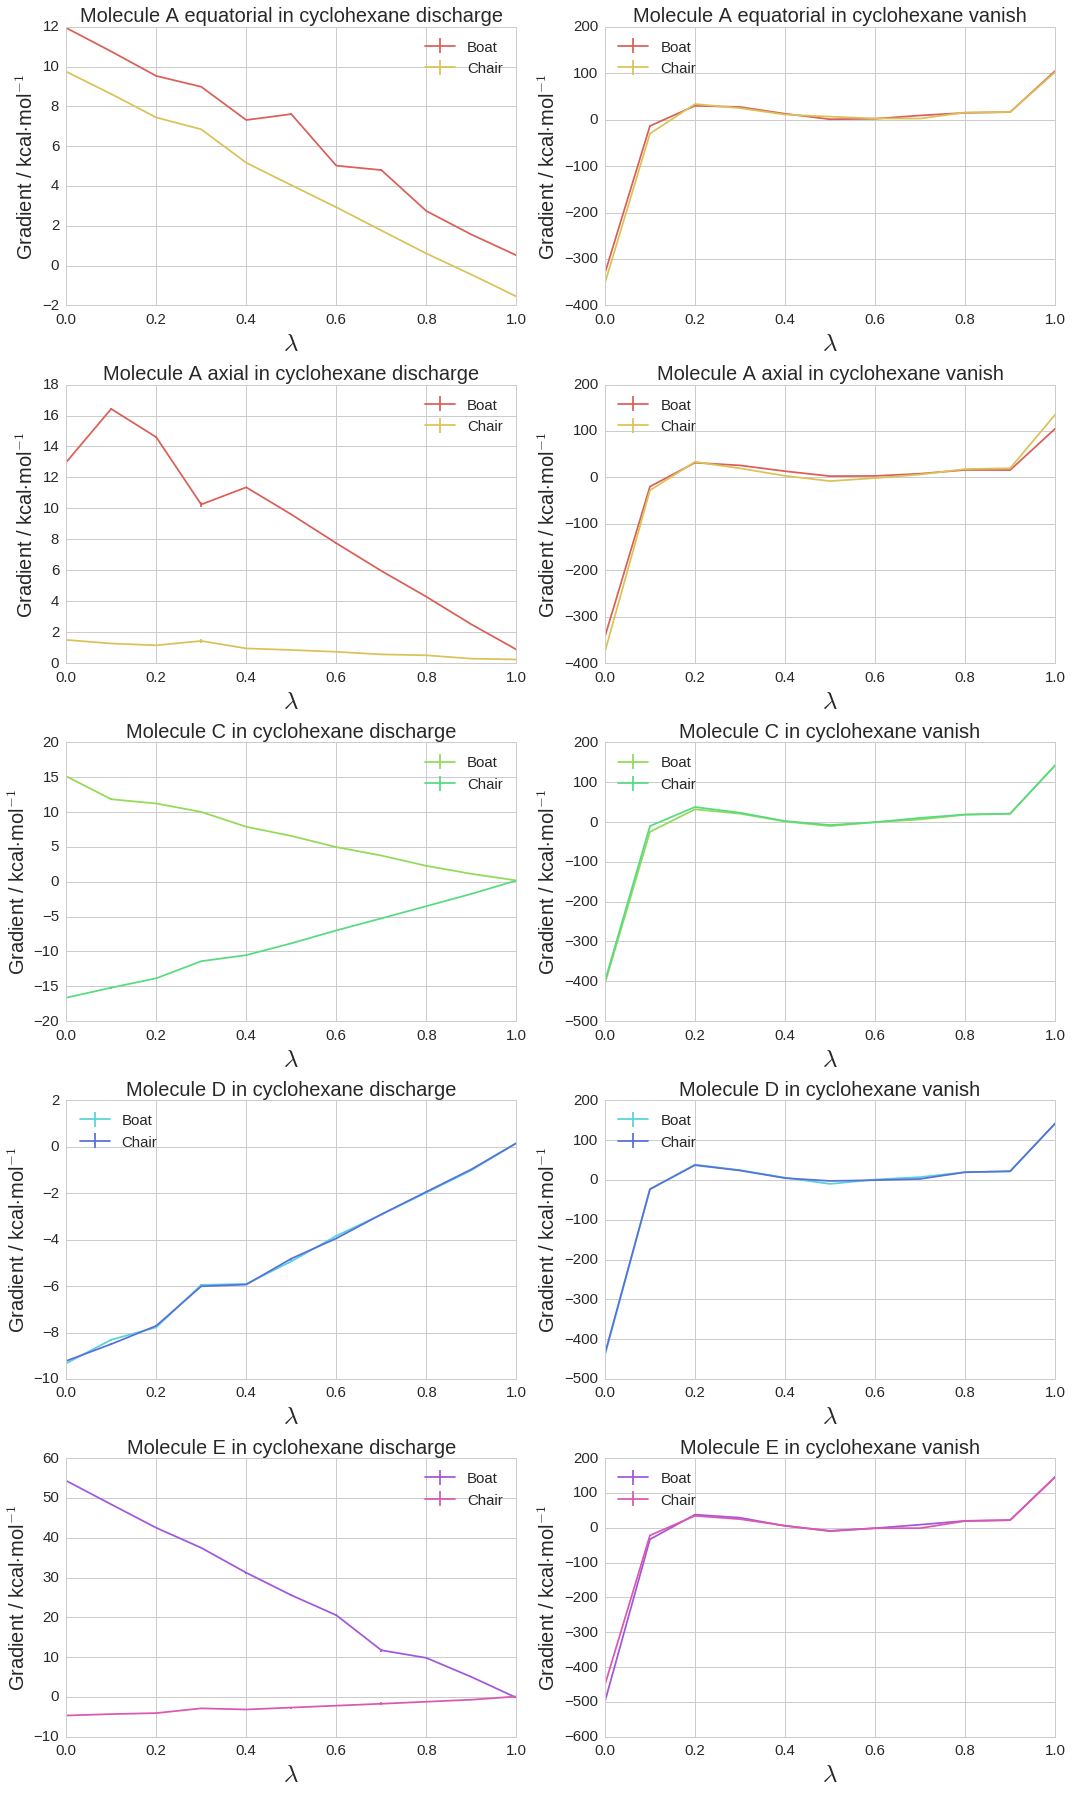

In [5]:
colors =(sbn.color_palette("hls", 8))
lambda_array = numpy.linspace(0.0,1.0,11)
#fix the xticks and yticks for all the plots to 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
#create a 4x2  subplot of 15"x20" dimension
fig,axarr = plt.subplots(5,2,figsize=(15,25))
#fix the space between subplots to .5"
fig.subplots_adjust(hspace=.5)


#a boat equatorial discharge vs a char discharge
axarr[0,0].errorbar(lambda_array,aeq_cyc_boat_disc[:,1],yerr=aeq_cyc_boat_disc[:,2],color=colors[0],label="Boat")
axarr[0,0].errorbar(lambda_array,aeq_cyc_chair_disc[:,1],yerr=aeq_cyc_boat_disc[:,2],color=colors[1],label="Chair")
axarr[0,0].set_xlabel(r"$\lambda$",fontsize=25)
axarr[0,0].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[0,0].set_title("Molecule A equatorial in cyclohexane discharge",fontsize=20)
axarr[0,0].legend(loc="best",fontsize=15)

#a boat equatorial vanish vs a char vanish
axarr[0,1].errorbar(lambda_array,aeq_cyc_boat_van[:,1],yerr=aeq_cyc_boat_van[:,2],color=colors[0],label="Boat")
axarr[0,1].errorbar(lambda_array,aeq_cyc_chair_van[:,1],yerr=aeq_cyc_boat_van[:,2],color=colors[1],label="Chair")
axarr[0,1].set_xlabel(r"$\lambda$",fontsize=25)
axarr[0,1].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[0,1].set_title("Molecule A equatorial in cyclohexane vanish",fontsize=20)
axarr[0,1].legend(loc="best",fontsize=15)

#a boat axial discharge vs a char discharge
axarr[1,0].errorbar(lambda_array,aax_cyc_boat_disc[:,1],yerr=aax_cyc_boat_disc[:,2],color=colors[0],label="Boat")
axarr[1,0].errorbar(lambda_array,aax_cyc_chair_disc[:,1],yerr=aax_cyc_boat_disc[:,2],color=colors[1],label="Chair")
axarr[1,0].set_xlabel(r"$\lambda$",fontsize=25)
axarr[1,0].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[1,0].set_title("Molecule A axial in cyclohexane discharge",fontsize=20)
axarr[1,0].legend(loc="best",fontsize=15)

#a boat axial vanish vs a char vanish
axarr[1,1].errorbar(lambda_array,aax_cyc_boat_van[:,1],yerr=aax_cyc_boat_van[:,2],color=colors[0],label="Boat")
axarr[1,1].errorbar(lambda_array,aax_cyc_chair_van[:,1],yerr=aax_cyc_boat_van[:,2],color=colors[1],label="Chair")
axarr[1,1].set_xlabel(r"$\lambda$",fontsize=25)
axarr[1,1].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[1,1].set_title("Molecule A axial in cyclohexane vanish",fontsize=20)
axarr[1,1].legend(loc="best",fontsize=15)

#c boat discharge vs c char discharge
axarr[2,0].errorbar(lambda_array,c_cyc_boat_disc[:,1],yerr=c_cyc_boat_disc[:,2],color=colors[2],label="Boat")
axarr[2,0].errorbar(lambda_array,c_cyc_chair_disc[:,1],yerr=c_cyc_boat_disc[:,2],color=colors[3],label="Chair")
axarr[2,0].set_xlabel(r"$\lambda$",fontsize=25)
axarr[2,0].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[2,0].set_title("Molecule C in cyclohexane discharge",fontsize=20)
axarr[2,0].legend(loc="best",fontsize=15)

#c boat vanish vs c char vanish
axarr[2,1].errorbar(lambda_array,c_cyc_boat_van[:,1],yerr=c_cyc_boat_van[:,2],color=colors[2],label="Boat")
axarr[2,1].errorbar(lambda_array,c_cyc_chair_van[:,1],yerr=c_cyc_boat_van[:,2],color=colors[3],label="Chair")
axarr[2,1].set_xlabel(r"$\lambda$",fontsize=25)
axarr[2,1].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[2,1].set_title("Molecule C in cyclohexane vanish",fontsize=20)
axarr[2,1].legend(loc="best",fontsize=15)
fig.tight_layout()

#d boat discharge vs d chair discharge
axarr[3,0].errorbar(lambda_array,d_cyc_boat_disc[:,1],yerr=d_cyc_boat_disc[:,2],color=colors[4],label="Boat")
axarr[3,0].errorbar(lambda_array,d_cyc_chair_disc[:,1],yerr=d_cyc_boat_disc[:,2],color=colors[5],label="Chair")
axarr[3,0].set_xlabel(r"$\lambda$",fontsize=25)
axarr[3,0].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[3,0].set_title("Molecule D in cyclohexane discharge",fontsize=20)
axarr[3,0].legend(loc="best",fontsize=15)

#d boat vanish vs d chair vanish
axarr[3,1].errorbar(lambda_array,d_cyc_boat_van[:,1],yerr=d_cyc_boat_van[:,2],color=colors[4],label="Boat")
axarr[3,1].errorbar(lambda_array,d_cyc_chair_van[:,1],yerr=d_cyc_boat_van[:,2],color=colors[5],label="Chair")
axarr[3,1].set_xlabel(r"$\lambda$",fontsize=25)
axarr[3,1].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[3,1].set_title("Molecule D in cyclohexane vanish",fontsize=20)
axarr[3,1].legend(loc="best",fontsize=15)
fig.tight_layout()

#e boat discharge vs e chair discharge
axarr[4,0].errorbar(lambda_array,e_cyc_boat_disc[:,1],yerr=e_cyc_boat_disc[:,2],color=colors[6],label="Boat")
axarr[4,0].errorbar(lambda_array,e_cyc_chair_disc[:,1],yerr=e_cyc_boat_disc[:,2],color=colors[7],label="Chair")
axarr[4,0].set_xlabel(r"$\lambda$",fontsize=25)
axarr[4,0].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[4,0].set_title("Molecule E in cyclohexane discharge",fontsize=20)
axarr[4,0].legend(loc="best",fontsize=15)

#d boat vanish vs d chair vanish
axarr[4,1].errorbar(lambda_array,e_cyc_boat_van[:,1],yerr=e_cyc_boat_van[:,2],color=colors[6],label="Boat")
axarr[4,1].errorbar(lambda_array,e_cyc_chair_van[:,1],yerr=e_cyc_boat_van[:,2],color=colors[7],label="Chair")
axarr[4,1].set_xlabel(r"$\lambda$",fontsize=25)
axarr[4,1].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[4,1].set_title("Molecule E in cyclohexane vanish",fontsize=20)
axarr[4,1].legend(loc="best",fontsize=15)
fig.tight_layout()



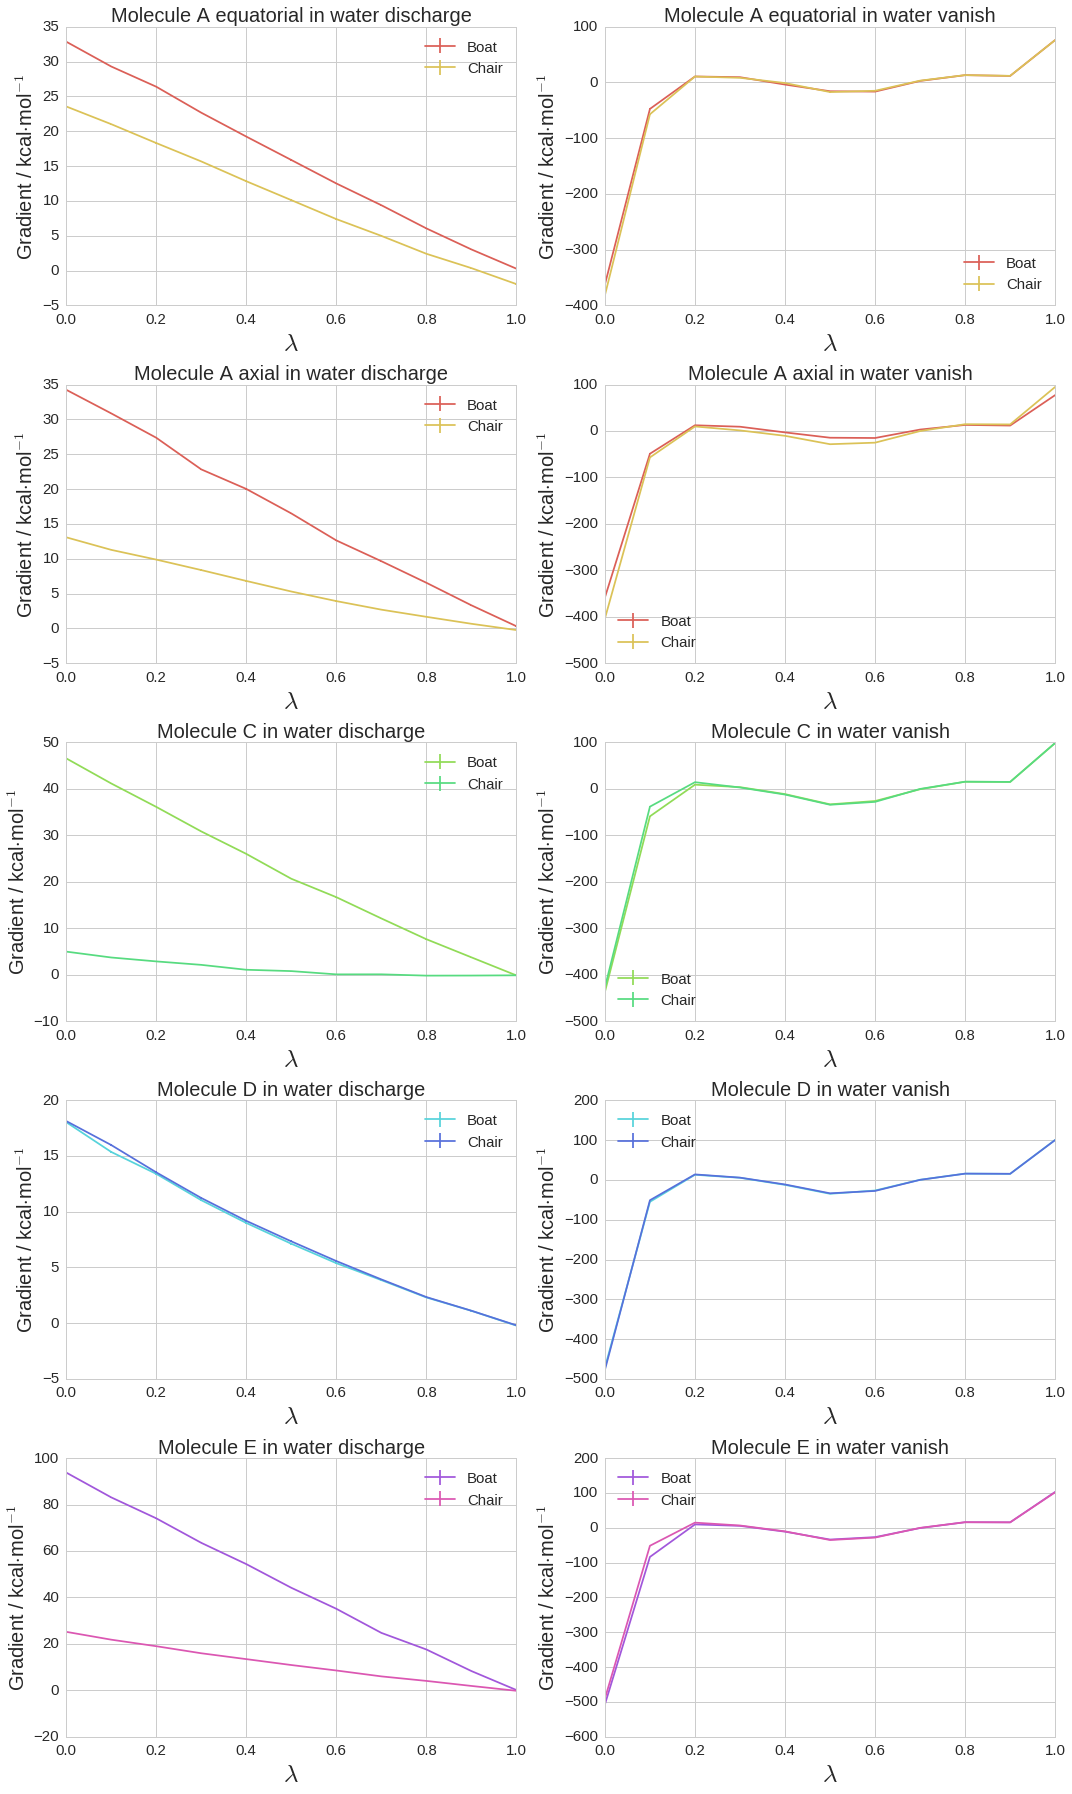

In [6]:
colors =(sbn.color_palette("hls", 8))
lambda_array = numpy.linspace(0.0,1.0,11)
#fix the xticks and yticks for all the plots to 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
#create a 4x2  subplot of 15"x20" dimension
fig,axarr = plt.subplots(5,2,figsize=(15,25))
#fix the space between subplots to .5"
fig.subplots_adjust(hspace=.5)


#a boat equatorial discharge vs a char discharge
axarr[0,0].errorbar(lambda_array,aeq_wat_boat_disc[:,1],yerr=aeq_wat_boat_disc[:,2],color=colors[0],label="Boat")
axarr[0,0].errorbar(lambda_array,aeq_wat_chair_disc[:,1],yerr=aeq_wat_boat_disc[:,2],color=colors[1],label="Chair")
axarr[0,0].set_xlabel(r"$\lambda$",fontsize=25)
axarr[0,0].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[0,0].set_title("Molecule A equatorial in water discharge",fontsize=20)
axarr[0,0].legend(loc="best",fontsize=15)

#a boat equatorial vanish vs a char vanish
axarr[0,1].errorbar(lambda_array,aeq_wat_boat_van[:,1],yerr=aeq_wat_boat_van[:,2],color=colors[0],label="Boat")
axarr[0,1].errorbar(lambda_array,aeq_wat_chair_van[:,1],yerr=aeq_wat_boat_van[:,2],color=colors[1],label="Chair")
axarr[0,1].set_xlabel(r"$\lambda$",fontsize=25)
axarr[0,1].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[0,1].set_title("Molecule A equatorial in water vanish",fontsize=20)
axarr[0,1].legend(loc="best",fontsize=15)

#a boat axial discharge vs a char discharge
axarr[1,0].errorbar(lambda_array,aax_wat_boat_disc[:,1],yerr=aax_wat_boat_disc[:,2],color=colors[0],label="Boat")
axarr[1,0].errorbar(lambda_array,aax_wat_chair_disc[:,1],yerr=aax_wat_boat_disc[:,2],color=colors[1],label="Chair")
axarr[1,0].set_xlabel(r"$\lambda$",fontsize=25)
axarr[1,0].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[1,0].set_title("Molecule A axial in water discharge",fontsize=20)
axarr[1,0].legend(loc="best",fontsize=15)

#a boat axial vanish vs a char vanish
axarr[1,1].errorbar(lambda_array,aax_wat_boat_van[:,1],yerr=aax_wat_boat_van[:,2],color=colors[0],label="Boat")
axarr[1,1].errorbar(lambda_array,aax_wat_chair_van[:,1],yerr=aax_wat_boat_van[:,2],color=colors[1],label="Chair")
axarr[1,1].set_xlabel(r"$\lambda$",fontsize=25)
axarr[1,1].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[1,1].set_title("Molecule A axial in water vanish",fontsize=20)
axarr[1,1].legend(loc="best",fontsize=15)

#c boat discharge vs c char discharge
axarr[2,0].errorbar(lambda_array,c_wat_boat_disc[:,1],yerr=c_wat_boat_disc[:,2],color=colors[2],label="Boat")
axarr[2,0].errorbar(lambda_array,c_wat_chair_disc[:,1],yerr=c_wat_boat_disc[:,2],color=colors[3],label="Chair")
axarr[2,0].set_xlabel(r"$\lambda$",fontsize=25)
axarr[2,0].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[2,0].set_title("Molecule C in water discharge",fontsize=20)
axarr[2,0].legend(loc="best",fontsize=15)

#c boat vanish vs c char vanish
axarr[2,1].errorbar(lambda_array,c_wat_boat_van[:,1],yerr=c_wat_boat_van[:,2],color=colors[2],label="Boat")
axarr[2,1].errorbar(lambda_array,c_wat_chair_van[:,1],yerr=c_wat_boat_van[:,2],color=colors[3],label="Chair")
axarr[2,1].set_xlabel(r"$\lambda$",fontsize=25)
axarr[2,1].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[2,1].set_title("Molecule C in water vanish",fontsize=20)
axarr[2,1].legend(loc="best",fontsize=15)
fig.tight_layout()

#d boat discharge vs d chair discharge
axarr[3,0].errorbar(lambda_array,d_wat_boat_disc[:,1],yerr=d_wat_boat_disc[:,2],color=colors[4],label="Boat")
axarr[3,0].errorbar(lambda_array,d_wat_chair_disc[:,1],yerr=d_wat_boat_disc[:,2],color=colors[5],label="Chair")
axarr[3,0].set_xlabel(r"$\lambda$",fontsize=25)
axarr[3,0].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[3,0].set_title("Molecule D in water discharge",fontsize=20)
axarr[3,0].legend(loc="best",fontsize=15)

#d boat vanish vs d chair vanish
axarr[3,1].errorbar(lambda_array,d_wat_boat_van[:,1],yerr=d_wat_boat_van[:,2],color=colors[4],label="Boat")
axarr[3,1].errorbar(lambda_array,d_wat_chair_van[:,1],yerr=d_wat_boat_van[:,2],color=colors[5],label="Chair")
axarr[3,1].set_xlabel(r"$\lambda$",fontsize=25)
axarr[3,1].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[3,1].set_title("Molecule D in water vanish",fontsize=20)
axarr[3,1].legend(loc="best",fontsize=15)
fig.tight_layout()

#e boat discharge vs e chair discharge
axarr[4,0].errorbar(lambda_array,e_wat_boat_disc[:,1],yerr=e_wat_boat_disc[:,2],color=colors[6],label="Boat")
axarr[4,0].errorbar(lambda_array,e_wat_chair_disc[:,1],yerr=e_wat_boat_disc[:,2],color=colors[7],label="Chair")
axarr[4,0].set_xlabel(r"$\lambda$",fontsize=25)
axarr[4,0].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[4,0].set_title("Molecule E in water discharge",fontsize=20)
axarr[4,0].legend(loc="best",fontsize=15)

#d boat vanish vs d chair vanish
axarr[4,1].errorbar(lambda_array,e_wat_boat_van[:,1],yerr=e_wat_boat_van[:,2],color=colors[6],label="Boat")
axarr[4,1].errorbar(lambda_array,e_wat_chair_van[:,1],yerr=e_wat_boat_van[:,2],color=colors[7],label="Chair")
axarr[4,1].set_xlabel(r"$\lambda$",fontsize=25)
axarr[4,1].set_ylabel("Gradient / kcal$\cdot$mol$^{-1}$",fontsize=20)
axarr[4,1].set_title("Molecule E in water vanish",fontsize=20)
axarr[4,1].legend(loc="best",fontsize=15)
fig.tight_layout()

